In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import Image
import pandas as pd

### Review of lecture 25

We learned how to plot things in 3D.

#### In this lecture we will:

- Take a look at data with respect to time (time series)

- Learn a bit about time series analysis. 




### Time series in Earth Science 

#### Earth's orbit - pacemaker of the Ice Ages

One of the classic problems in Earth Science is the question about what controlled the coming and going of the great ice sheets.  It has long been  known that there were several, perhaps many, ice ages in the European Alps as several keen observationalists (among them the German author/poet/gentleman scientist, Goethe), had noticed that Alpine glaciers must have been larger in the past. 

Between 1837 and 1840, a Swiss-American geologist named Jean Louis Agassiz  produced solid evidence on the movements of glaciers from the remaining moraines, striations and glacial erratics that   much of Europe was covered with a vast ice sheet like that still on Greenland today. That said,    the causes of these profound climatic changes remained a mystery.  

In 1920, Milutin Milankovitz  explained the coming and going of ice ages as a response to changes in the Earth's _insolation_ (the amount of energy recieved from the sun). He argued that insolation is controlled by changes in the Earth's orbit around the sun.  This idea has now been widely embraced by the paleoclimate community, largely because of the very strong coherence between  cycles in Earth's orbit and evidence for changes in ice volume using geochemical proxies like oxygen isotopic ratios.  

The orbital cycles can be calculated knowing the exact configuration of the planets.  Milankovitch famously did the first stab at it from his prison cell during WW I. Nowadays this is done with fancy computers.  The key parameters are _eccentricity_ (or ovalness of the orbit around the sun), the _obliquity_ (tilt) of the spin axis and the _precession_ of the spin axis.  


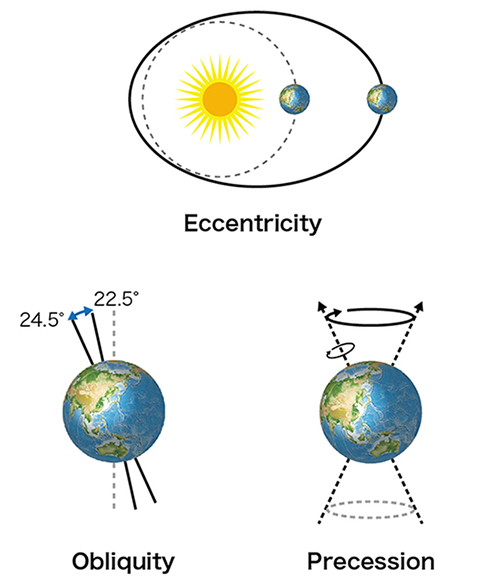

In [2]:
Image(filename='Figures/Milankovitch_Cycles.jpg')

[_Figure from_ http://www.jamstec.go.jp/e/about/press_release/20141027/; _see also_ http://www.sciencecourseware.org/eec/GlobalWarming/Tutorials/Milankovitch/].  

The Earth's orbital parameters of ellipticity, obliquity and precession vary in predictable ways.  One commonly used model for variations in them over the last few hundred million years was published by Laskar et al. (2004; http://dx.doi.org/10.1051/0004-6361:20041335).  

Let's take a look for the behavior of the last few million years using the data file from the Laskar et al. (2004) paper. 


In [3]:
# Read in the datafile into a Pandas DataFrame
cycles=pd.read_csv('Datasets/IceAges/INSOLN.LA2004.BTL.100.csv')
print (cycles.columns)

Index(['Age (ka)', 'Eccentricity', 'Obliquity', 'Precession'], dtype='object')


So, first we filter the data to only show the last  million years, then plot it as time series.   

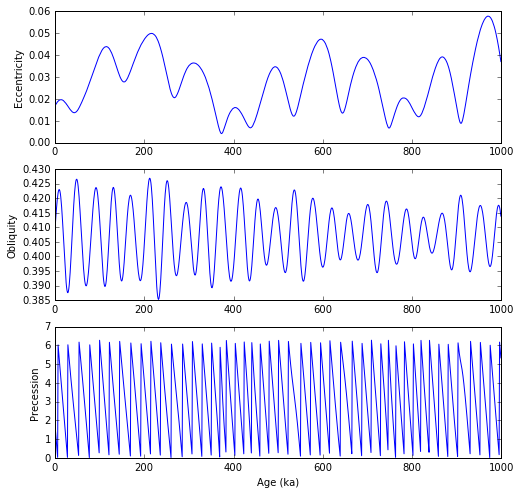

In [4]:
cycles_1Ma=cycles[cycles['Age (ka)']<1000] # only look at last 1000 ka (1 Million).   

# set up the plot as three rows
# start with Eccentricity
fig=plt.figure(1,(8,8)) # make a nice big plot
fig.add_subplot(311) # notice how you do not need the commas!
plt.plot(cycles_1Ma['Age (ka)'],cycles_1Ma['Eccentricity'])
plt.ylabel('Eccentricity')

# add obliquity
fig.add_subplot(312)
plt.plot(cycles_1Ma['Age (ka)'],cycles_1Ma['Obliquity'])
plt.ylabel('Obliquity')

# add precession
fig.add_subplot(313)
plt.plot(cycles_1Ma['Age (ka)'],cycles_1Ma['Precession'])
plt.ylabel('Precession')
plt.xlabel('Age (ka)');


You can see a lot of cycles on different time scales. But the trick is how this relates to the amount of insolation.  There are many attempts in the literature to convert the orbital parameters like those in the above plot to the amount of insolation received by the Earth's atmosphere as a function of latitude and age.  One recent one was by Huybers (Huybers, P. 2006, http://dx.doi.org/10.1126/science.1125249).   You can get the data (credited to Huybers and our own Professor Ian Eisenman)
from here: https://www.ncdc.noaa.gov/paleo-search/study/5792.  

It is traditional to consider the amount of insolation received at 65$^{\circ}$N.  So let's take a look.

Index(['Age (ka)', 'Insolation (W/m^2)'], dtype='object')


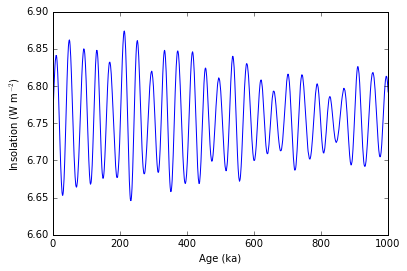

In [5]:
#read into a pandas DataFrame
insol=pd.read_csv('Datasets/IceAges/j_65north.csv')
print (insol.columns)
plt.plot(insol['Age (ka)'],insol['Insolation (W/m^2)'])
plt.xlim(0,1000)
plt.ylabel('Insolation (W m$^{-2}$)')
plt.xlabel('Age (ka)');

But how do we relate these wiggles to ice ages?  Glaciers tend to over-ride the evidence of their older siblings, so how do we know the timing and extent of past glaciations?  The answer is that marine fossils made of calcium carbonate (like foraminifera) retain a record of the oxygen isotopic ratios of the sea water in which they live.  And "So?", you say.  What does that have to do with ice volume?   Here is the answer in a nutshell: 
- There are several isotopes of oxygen, two of which are fairly common $^{18}$O and $^{16}$O.  
- When water evaporates, the lighter isotope is enriched in the clouds, making the water body that is left 'heavier'.  When the water rains back out again, the process is reversed, so nothing should happen over time, right?  What goes up must come down.  But it isn't that simple.  
- Evaporation happens mostly in the tropics (because it is hot there) and clouds move north raining out as they go.  This results in an enrichment of the snow that ultimately gets stored in the major ice sheets (Greenland/Antarctica) of the light isotope and sea water gets heavier (a process known as Raleigh distillation). So the ratio of the two isotopes is a measure of ice volume.  

The next trick was to measure the isotopic ratios in foraminifera recovered from deep sea sediment cores and to DATE them. The latter was done using magnetic stratigraphy (see, e.g., Shackleton and Opdyke, 1973, Quaternary Research, 3, 39-55, https://doi.org/10.1016/0033-5894(73)90052-5)  

A modern version of these data was published by Lisecki and Raymo (2005, http://dx.doi.org/10.1029/2004PA001071) called the LR04 stack.  This is   a stack of 58 records of oxygen isotopic variations, several of which were independently dated using magnetostratigraphy, from all over the world's oceans.   



Let's take a look at that record: 

In [6]:
d18O=pd.read_csv('Datasets/IceAges/LR04stack.csv')
print (d18O.columns)

Index(['Age (ka)', 'd18O', 'uncertainty'], dtype='object')


The data are cast as $\delta ^{18}O$, defined as: 


$$\delta ^{{18}}O={\Biggl (}{\frac  {{\bigl (}{\frac  {^{{18}}O}{^{{16}}O}}{\bigr )}_{{sample}}}{{\bigl (}{\frac  {^{{18}}O}{^{{16}}O}}{\bigr )}_{{standard}}}}-1{\Biggr )}*1000\ ^{{o}}\!/\!_{{oo}}$$

Let's plot them up for the last million years. 




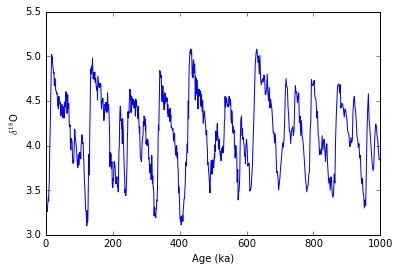

In [7]:
d18O_1Ma=d18O[d18O['Age (ka)']<1000] # filter data for last 1Ma
plt.plot(d18O_1Ma['Age (ka)'],d18O_1Ma['d18O'])
plt.xlabel('Age (ka)')
plt.ylabel('$\delta ^{18}$O');

So both insolation and $\delta ^{18}$O have wiggles over the last million years, but are they the SAME wiggles?  One way to look at this is using _time series analysis_.   There are whole courses devoted to this subject and a complete treatment is WAY beyond the scope of this class, but we can do a tiny bit to answer the basic question posed by the isotope/insolation story.  The big question is:  Do the two data sets have wiggles  with the same frequencies?  

The analysis boils down to this: 

- According to one very smart guy named Fourier, any periodic function $f(t)$ can be represented as the sum of a series of sines and cosines:   

$$f(t)=a_0+ \sum_{r=1}^\infty \bigr[a_r    \cos  \bigr( { {2\pi r}\over{T}}   t\bigr)  + b_r    \sin  \bigr( { {2\pi r}\over{T}}   t\bigl) \bigl]  $$

- You can represent data as a series in time (in the time-domain) as we have been doing OR you can represent the data in terms of frequency, looking for the _power_ in the data as a function of frequency.  This is known as the _power spectrum_. 

There is much more to learn about this that is beyond what we can do here (mostly having to do how you massage the data).  If you are curious, there are some very nice Python wrappers for beautiful code for doing cool state-of-the-art time series analysis (see, e.g., http://krischer.github.io/mtspec/ for how to install the code and examples of how to use it. Let me know if you want help doing this, for example for a final project.)  

Let's do a zero order analysis that produces a _periodogram_, which is a plot of power versus frequency. We will do this with the minimum of massaging.


Let us take advantage of a **signal.periodogram** function in the **scipy** package.  That module has functions that allow us to  calculate the _power spectral density_ for a time series.  

Also, we know that eccentricity is supposed to have a dominant period at 100 kyr, obliquity at 41 kyr and precession at 23 and 19 kyr. Remember that these numbers are expressed in terms of  the period, which is the inverse of the frequency. 

We can see how our minimalist treatment works.  

Let's start with precession:



In [8]:
# first we import the necessary function:
from scipy import signal as signal 

help(signal.periodogram)


Help on function periodogram in module scipy.signal.spectral:

periodogram(x, fs=1.0, window='boxcar', nfft=None, detrend='constant', return_onesided=True, scaling='density', axis=-1)
    Estimate power spectral density using a periodogram.
    
    Parameters
    ----------
    x : array_like
        Time series of measurement values
    fs : float, optional
        Sampling frequency of the `x` time series. Defaults to 1.0.
    window : str or tuple or array_like, optional
        Desired window to use. See `get_window` for a list of windows
        and required parameters. If `window` is array_like it will be
        used directly as the window and its length must be nperseg.
        Defaults to 'boxcar'.
    nfft : int, optional
        Length of the FFT used. If `None` the length of `x` will be
        used.
    detrend : str or function or `False`, optional
        Specifies how to detrend each segment. If `detrend` is a
        string, it is passed as the `type` argument to the 

In [9]:
help(signal)

Help on package scipy.signal in scipy:

NAME
    scipy.signal

DESCRIPTION
    Signal processing (:mod:`scipy.signal`)
    
    Convolution
    
    .. autosummary::
       :toctree: generated/
    
       convolve           -- N-dimensional convolution.
       correlate          -- N-dimensional correlation.
       fftconvolve        -- N-dimensional convolution using the FFT.
       convolve2d         -- 2-dimensional convolution (more options).
       correlate2d        -- 2-dimensional correlation (more options).
       sepfir2d           -- Convolve with a 2-D separable FIR filter.
       choose_conv_method -- Chooses faster of FFT and direct convolution methods.
    
    B-splines
    
    .. autosummary::
       :toctree: generated/
    
       bspline        -- B-spline basis function of order n.
       cubic          -- B-spline basis function of order 3.
       quadratic      -- B-spline basis function of order 2.
       gauss_spline   -- Gaussian approximation to the B-splin

We can call the function, which returns frequencies and power. 


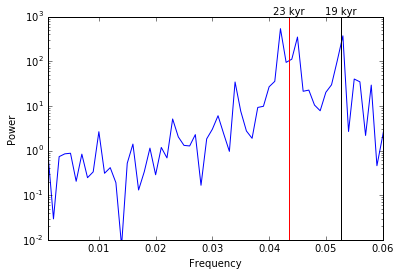

In [10]:
# make an array out of the desired data series
prec=np.array(cycles_1Ma['Precession'])

# and calculate the frequencies 
prec_freqs,prec_power=signal.periodogram(prec)
# plot on a linear x, log y plot (using semilogy( ))
plt.semilogy(prec_freqs,prec_power)
plt.ylim(.01,1000) # truncate the Y axis
plt.xlim(.001,.06) # truncate the X axis
# put on the precessional frequencies
plt.axvline(x=1./23.,color='red')  # use a vertical line
plt.axvline(x=1./19.,color='black')
plt.xlabel('Frequency') # label the axes
plt.ylabel('Power')
plt.text(1./23.,1000,'23 kyr',ha='center',va='bottom')
plt.text(1./19.,1000,'19 kyr',ha='center',va='bottom');




It is a little rough but you can clearly see the two peaks near 23 and 19 kyr. We could smooth out the diagram by exploring _windowing_ options, but for now, let us just plow on, looking at obliquity next.  



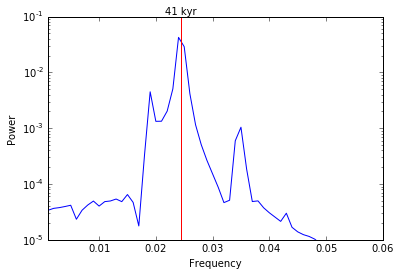

In [11]:
# make an array out of the desired data series
obl=np.array(cycles_1Ma['Obliquity'])

# and calculate the frequencies 
obl_freqs,obl_power=signal.periodogram(obl)

plt.semilogy(obl_freqs,obl_power)
plt.ylim(.00001,.1)
plt.xlim(.001,.06)
# put on the obliquity frequencies
plt.axvline(x=1./41.,color='red') 
plt.xlabel('Frequency')
plt.ylabel('Power')
plt.text(1./41.,.1,'41 kyr',ha='center',va='bottom');


### Practice with periodograms

Modify the above code to look at the eccentricity! 

### Are there orbital frequencies in the isotopic data? 

At last we can look at our isotope time series and see if the same frequencies are there.  If so, that would support Milankovitch's famous hypothesis regarding orbits and ice ages.  

We will also throw in an example of a _window_ in the periodogram calculation.  What a _window_ does is multiply the time series by a function (called a taper) that weights information, suppressing data at the edges of the window and focussing on the center of the window.  The simplest window is a _box car_ which gives equal weight to everything inside the window.  In the following, we will use a _Blackman window_ which looks more like a bell curve.   

You can find out more about windowing (a.k.a. tapering) from this website:  

https://en.wikipedia.org/wiki/Window_function

Let's take a look at the LR04 data set. 


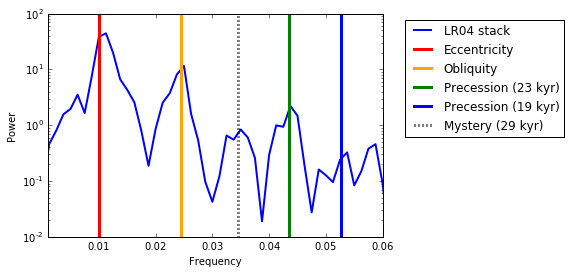

In [15]:
iso=d18O_1Ma['d18O'] # pick out the data series
# set the window with the keyword 'window'
iso_freqs,iso_power=signal.periodogram(iso,window='blackman')
plt.semilogy(iso_freqs,iso_power,label='LR04 stack',linewidth=2)
plt.ylim(.01,100) # put bounds on the axes
plt.xlim(.001,.06)
plt.axvline(x=1./100.,color='red',label='Eccentricity',linewidth=3) 
plt.axvline(x=1./41.,color='orange',label='Obliquity',linewidth=3) 
plt.axvline(x=1./23.,color='green',label='Precession (23 kyr)',linewidth=3) 
plt.axvline(x=1./19.,color='blue',label='Precession (19 kyr)',linewidth=3)
plt.axvline(x=1./29.,color='black',label='Mystery (29 kyr)',linewidth=3,linestyle='dotted')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2) # notice this
# way of putting the legend to the right of the plot


plt.xlabel('Frequency')
plt.ylabel('Power'); 

And... of course there is lots of power in the Milankovitch periods. But there is an extra 'hump' at 29 kyr which Lisecki and Raymo say is, "commonly observed and is thought to be a nonlinear climate response", citing a paper by Huybers and Wunsch (2004).  Hmmm. Room for more research. 

Of course there is lots more to know about this subject, like "How do the orbital parameters control the ice volume?" and, "Why are we not heading into an ice age now?" as Milankovitch theory would predict.  

### Assignment #9
9.1:
- Take the earthquake data set analyzed in Lecture 25 and select data for the Andean margin.  
- Make a 3D image of the slab. 
- Make the symbol size proportional to the magnitude of the earthquake.

9.2:
- Filter the LR04 data for the interval between 1 and 2 million years ago. 
- Recreate the periodogram for that interval, putting on  the Milankovitch periods.
- How does this plot compare with the one for 0-1 Ma done in Lecture 26?   